# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats.mstats import normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
print(df.shape)
df.head()

(130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


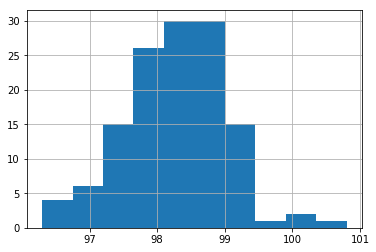

In [4]:
df.temperature.hist()

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


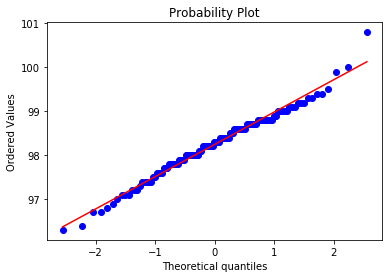

In [12]:
print(normaltest(df.temperature))
st.probplot(df.temperature, dist='norm', plot=plt)
plt.show()

## Q1

The distriubtion of temperature looks fairly normal. This is supported by the Q-Q plot and D’Agostino and Pearson’s test of normality based on skew and kurtosis of the distribution. The observed p-value (0.25) is above the critical p=0.05, hence the data does not differ significantly from a normal distribution.

## Q2

The above finding is consistent with the central limit theorem (CLT), which states data will be approximately normally distributed with more than 30 independent examples that have a finite variance. The sample of 130 examples here exceeds that threshold and is adequetly large. Further, the observations are independent as each temperature measurement is from a different person.

In [15]:
n = df.shape[0]
sample_avg = df.temperature.mean()
sample_std = df.temperature.std()
print('Average Temperature: {0} ({1})\n'.format(sample_avg, sample_std))

Average Temperature: 98.24923076923078 (0.7331831580389454)



In [33]:
pop_avg = 98.6
stat =(sample_avg - pop_avg) /  (sample_std/np.sqrt(n))
pvalue_z = st.norm.cdf(stat)*2
print('Z-statistic={0}, p-value={1} (two-tailed test)'.format(stat, pvalue_z))

Z-statistic=-5.454823292364079, p-value=4.90215701411338e-08 (two-tailed test)


## Q3

With our sample size that is adequetly greater than 30, using a z statistic is perferred to assess whether the sample mean temperature differs significantly from the generally accepted mean temperature of 98.6. A two-tailed test is appropriate because the observed mean temperature could be greater or smaller than general pop. mean - we have no prediction of difference direction. The obtained z-statistic and p-value indicate that we should reject the null hypothesis; hence, the mean temperature is significantly different from the generally accepted value of 98.6.

In [43]:
stat =(sample_avg - pop_avg) /  (sample_std/np.sqrt(n))
pvalue_t = st.t.cdf(np.abs(stat), n-1)*2
print('t-statistic={0}, p-value={1} (two-tailed test)\n'.format(stat, pvalue_t))
st.kstest(df.temperature, 't', (130,))

t-statistic=-5.454823292364079, p-value=1.9999997589367957 (two-tailed test)



KstestResult(statistic=1.0, pvalue=0.0)

## Q3 cont.

With a two-tailed t-test, the sample and population means do not significantly differ. Nevertheless, a t-test is not appropriate here based on the data being normally distributed and not t-distributed. This is further supported by the significant Kolmogorov-Smirnov (KS) test which indicates we can safely reject the null hypothesis that the sample is distributed according to the t-distribution.

In [79]:
critical_z = st.norm.ppf(.99)
ste = sample_std / np.sqrt(n)
margin_error = critical_z * ste
print('Margin of error: {0}\n'.format(margin_error))
ci_low = round(sample_avg - margin_error, 2)
ci_high = round(sample_avg + margin_error, 2)
print('99% confidence interval: {0} - {1}'.format(ci_low,  ci_high))

Margin of error: 0.1495944434022638

99% confidence interval: 98.1 - 98.4


## Q4

With 99% confidence based on this sample, someone's average temperature should fall within the range 98.1 to 98.4 degrees. A temperature outside this range might be considered 'abnormal.'

# Compare male vs female mean temperature

Temp means: male=98.1046, female=98.3938
Sample sizes: male=65, female=65


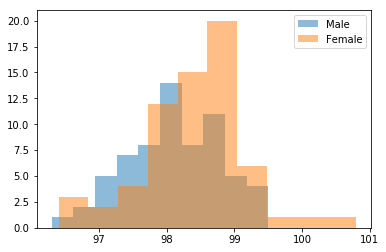

In [6]:
males = df[df.gender=='M'].temperature
females = df[df.gender=='F'].temperature
print('Temp means: male={0}, female={1}'.format(round(np.mean(males), 4), round(np.mean(females), 4)))
print('Sample sizes: male={0}, female={1}'.format(males.shape[0], females.shape[0]))
# histogram plots of temperatures
plt.hist(males, alpha=0.5, label='Male')
plt.hist(females, alpha=0.5, label='Female')
plt.legend(loc='upper right')
plt.show()

In [4]:
st.kstest(males, 'norm'), st.kstest(females, 'norm')

(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0))

In [10]:
print('t-test results: ')
st.ttest_ind(males, females)

t-test results: 


Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

## Q5

* Because the samples are independent and not normally distributed based on the KS-test, a t-test is appropriate to compare male vs female mean temperatures. 
* The observed p-value (*p*=0.023) indicates mean temperatures significantly differ between male and females.
* Here, average temperature is lower for males than females; however, 2 female's temps are much higher (>99.5 deg) than the upper bound of normal temperatures (98.4 deg), found in the 99% CI above. These extreme female temperatures may be exaggerating the difference between males and females. Obtaining more data woud be helpful in drawing firmer conclusions.
* Nonetheless, the above analyses do draw into the question the generally accepted mean temperature of 98.6 degrees - mean temperatures seems to be lower.